In [2]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [9]:
mnist = input_data.read_data_sets("MNIST_data/" , one_hot = True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [8]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000029000000648>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000290000005C8>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x0000029000000508>)

In [39]:
mnist.train.images.shape

(55000, 784)

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
first_image = mnist.train.images[412]
first_image = np.array(first_image ,dtype = 'float')
first_image = first_image.reshape((28,28))

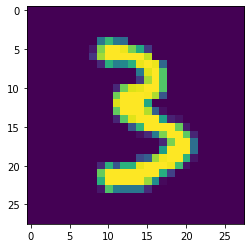

In [24]:
plt.imshow(first_image)
plt.show()

In [81]:
n_input =  784
n_hidden_1 = 256
n_hidden_2 = 256
n_classes = 10


In [82]:
weights = {
    'h1' : tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2' : tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}


In [83]:
def forward_propagation(x,weights,biases):
    in_layer1 = tf.add(tf.matmul(x,weights['h1']), biases['b1'] )
    out_layer1 = tf.nn.relu(in_layer1)
    
    in_layer2 = tf.add(tf.matmul(out_layer1,weights['h2']),biases['b2'])
    out_layer2 = tf.nn.relu(in_layer2)
    
    output = tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    
    return output
    

In [129]:
# sess = tf.Session()
# sess.run(tf.global_variables_initializer())
x = tf.placeholder("float", [None,n_input])
y = tf.placeholder(tf.int32,[None,n_classes])
pred = forward_propagation(x,weights,biases)

In [130]:
#cross entropy function(inbuilt)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = pred,labels = y))

In [131]:
optimizer = tf.train.AdamOptimizer(learning_rate = 0.02)
optimize = optimizer.minimize(cost)

In [132]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [134]:
batch_size = 100
for i in range(25):
    num_batches = int(mnist.train.num_examples/batch_size)
    total_cost = 0
    for j in range(batch_size):
        batch_x , batch_y = mnist.train.next_batch(batch_size)
        c , u = sess.run([cost,optimize] , feed_dict = {x:batch_x, y: batch_y})
        total_cost+=c
        
    print(total_cost)

2303.427791595459
2035.8944804668427
1454.4536482393742
1017.9015519618988
857.72099339962
604.8301301896572
372.93144215643406
380.4205938279629
400.5676124095917
329.23303554952145
328.58619295060635
193.15818283337052
199.92938824980592
185.2389448871836
191.13731157488655
200.38473065822473
152.16370165764005
127.22647032195394
104.76024879358545
89.57208019122481
101.8129508739512
124.30929697272222
57.59823706241832
68.9086310028215
52.51322986755076


In [135]:
predictions = tf.argmax(pred,1)
correct_labels = tf.argmax(y,1)
correct_prediction = tf.equal(predictions,correct_labels)

In [138]:
tr,df,er = sess.run([predictions,correct_labels,correct_prediction] , feed_dict = {x:mnist.test.images , y: mnist.test.labels})
print(tr,df,er)

[7 2 1 ... 4 5 6] [7 2 1 ... 4 5 6] [ True  True  True ...  True  True  True]


In [139]:
er.sum()

9459